# Exploration 02 : Regression

---


# 🩺👨‍⚕️ 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

이번 프로젝트에서는 회귀 문제를 맞추는 선형모델을 만들어보겠습니다. 

먼저 데이터 탐색(EDA)를 통해 데이터의 특성을 파악하고, 전처리 과정에서 가공해야할 부분이 있는지 살펴보겠습니다. 

이어서, 선형회귀 모델을 구현하고 출력값의 손실을 계산하여 결과를 개선해보겠습니다.

이를 위해서는 손실함수를 구현하고, 경사하강법으로 업데이트한 결과 값을 확인할 수 있게 만들어보겠습니다. 

이 프로젝트의 최종 목표는 손실 metric 결과가 3000이하로 떨어트리는 것입니다. 

## (1) 데이터 가져오기

데이터는 sklearn 라이브러리에서 제공하는 diabetes 데이터셋을 이용하겠습니다. 

특성(feature)은 다음과 같습니다:</br>
(특성들은 `표준화작업`이 적용된 값입니다.)

  - age     age in years
  - sex
  - bmi     body mass index
  - bp      average blood pressure
  - s1      tc, total serum cholesterol
  - s2      ldl, low-density lipoproteins
  - s3      hdl, high-density lipoproteins
  - s4      tch, total cholesterol / HDL
  - s5      ltg, possibly log of serum triglycerides level
  - s6      glu, blood sugar level
  
target은 환자의 당뇨병 1년 진행률을 수치화한 값이다.</br>
(quantitative measure of disease progression one year after baseline)

In [1]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
diabetes_data = load_diabetes()
df_X = diabetes_data.data
df_y = diabetes_data.target

In [3]:
print(type(df_X))
print(type(df_y))
print(df_X.shape)
print(df_y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(442, 10)
(442,)


In [4]:
ddf = pd.DataFrame(data  = df_X, columns = diabetes_data.feature_names)

In [5]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [6]:
ddf.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-1.444295e-18,2.543215e-18,-2.255925e-16,-4.854086e-17,-1.428596e-17,3.898811e-17,-6.028360e-18,-1.788100e-17,9.243486e-17,1.351770e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [7]:
ddf['target'] = diabetes_data.target

In [8]:
ddf.corr().style.background_gradient(cmap = 'YlGn')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


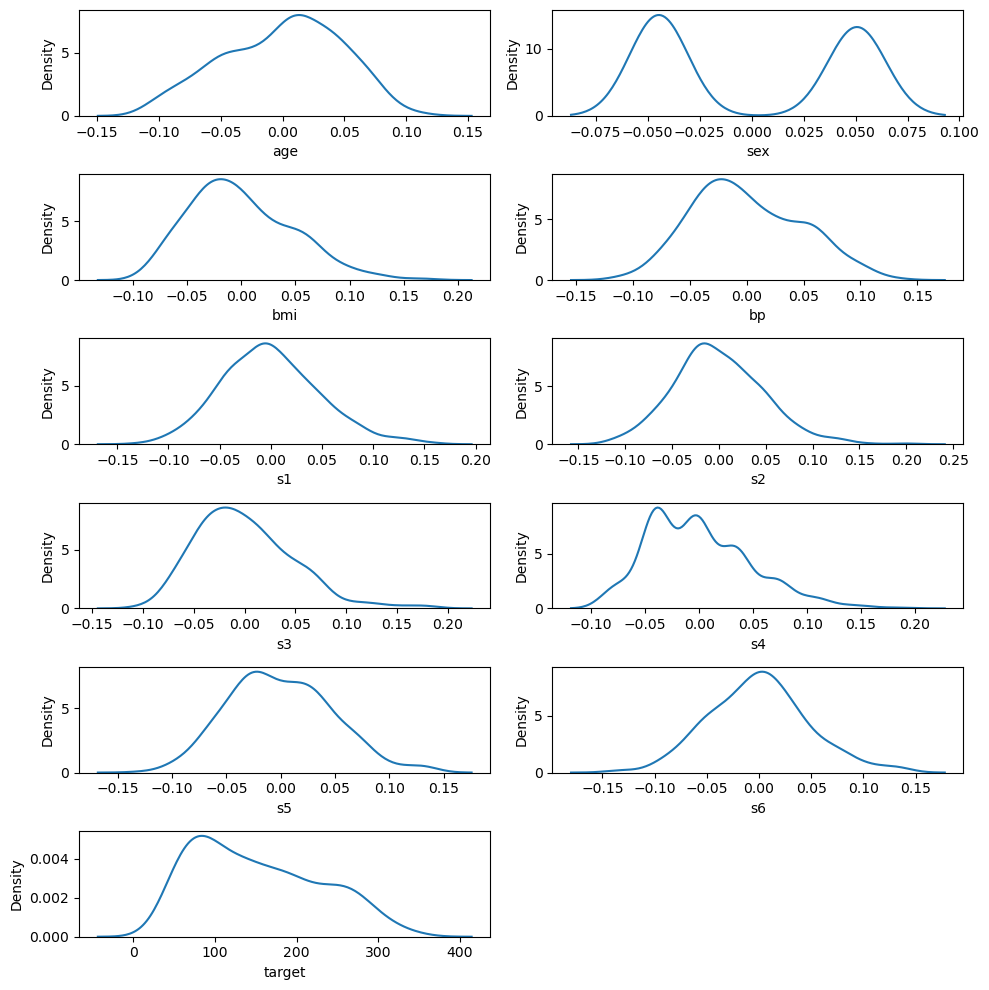

In [9]:
fig = plt.figure(figsize = (10,10))
for i, col in enumerate(ddf.columns) :
    ax = fig.add_subplot(6,2,i+1)
    sns.kdeplot(data=ddf,x=col)
plt.tight_layout()
plt.show()    

## (2) 모델에 입력할 데이터 X 준비하기

- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [10]:
df_X = np.array(df_X)
print(df_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


## (3) 모델에 예측할 데이터 y 준비하기

- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [11]:
df_y = np.array(df_y)

In [12]:
from sklearn.preprocessing import MinMaxScaler

물론 결과 값들이 1차적으로 표준화 작업을 거첬지만, 정규분포가 아닌 특성들이 있었습니다(e.i. sex, s4, bm1 등),</br>따라서 MinMaxSclaer로 정규화 작업을 2차적으로 또 하겠습니다. 

```(결과 값은 월등히 좋아지는 것을 확인하였습니다. 단 어떤 이유에서 그렇게 진행되는지는 결과값들을 하나하나씩 드려다 보고 살펴봐야겠습니다. 이 노트북에서는 확인하지 않겠습니다.)```

In [13]:
scaler = MinMaxScaler()
scaler.fit(df_X)
df_X = scaler.transform(df_X)

In [14]:
df_X

array([[0.66666667, 1.        , 0.58264463, ..., 0.28208745, 0.562217  ,
        0.43939394],
       [0.48333333, 0.        , 0.14876033, ..., 0.14104372, 0.22243673,
        0.16666667],
       [0.88333333, 1.        , 0.51652893, ..., 0.28208745, 0.49657763,
        0.40909091],
       ...,
       [0.68333333, 1.        , 0.28512397, ..., 0.24964739, 0.30503001,
        0.56060606],
       [0.28333333, 0.        , 0.49586777, ..., 0.39351199, 0.65702552,
        0.40909091],
       [0.28333333, 0.        , 0.0661157 , ..., 0.14104372, 0.46930394,
        0.51515152]])

## (4) train 데이터와 test 데이터로 분리하기

X와 y 데이터를 각각 train 데이터와 test 데이터로 분리하겠습니다.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.3, random_state =23)

print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(309, 10) (133, 10)
(309,) (133,)


## (5) 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비하겠습니다.
- 저희 목적은 경사하강법을 통해 가중치와 편향값을 업데이트 하는 것입니다. 따라서 무작위로 값들을 추출하겠습니다.

In [17]:
np.random.seed(0)
W = np.random.rand(10)
b = np.random.rand()
print(W)
print(b)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]
0.7917250380826646


np.random.seed 이용해서 같은 결과 값을 나오게 설정하였습니다. 

선형회귀 모델은 타겟값과 특성(feature)값의 선형관계를 찾아, 예측하는 모델입니다. </br>
수학식은 다음과 같은 일반적인 선을 찾을때 사용하는 함수입니다. 

$$y_i = W_0 + W_1X_{1} + ... + W_iX_{i} + b$$
$$y = XW + b$$

In [18]:
# 코드로 구현하면 다음과 같습니다. 
def regression_model(X,W,b) :
    y = np.dot(X,W) + b
    return y

## (6) 손실함수 loss 정의하기

손실함수는 실제값과 예측값의 차이값(오차)를 측정해주는 하나의 metric입니다. 

저희는 Mean Squared Error 사용하겠습니다. 

회귀모델 성능을 확인하기 위해서 다른 metric도 사용합니다. 

- MAE : 실제값과 예측값의 차이값의 절대값의 평균 
- MSE : 실제값과 예측값의 차이값을 제곱한 값의 평균
- RMSE : 실제값과 예측값의 차이값을 제곱한 값을 제곱근한 값의 평균

상황마다 각 손실함수들이 더 효과적일때 있습니다. 

MSE와 MAE는 이상치의 민감하고, RMSE 이상치의 덜 민감하지만 미분이 불가능한 지점을 갖습니다. 

https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62

In [19]:
def MSE(a,b):
    MSE = ((a - b) ** 2).mean()
    return MSE

## (7) 기울기를 구하는 gradient 함수 구현하기

이제 모델을 구현하였고, 모델이 학습할 수 있게 기울기를 계산하는 gradient 함수를 구현하겠습니다. 

GradientDescent는 손실함수의 오차 값을 최소화해줄 수 있는 가중치와 편향값을 빠르게 구해줍니다. 

손실함수의 미분을 구하여, 기울기를 구해줍니다. 

이 기울기가 중요한 이유는 모델의 가중치를 증가 또는 감소시켜야할지 알려주기 때문입니다. 

다음의 식을 확인하면, 음의 기울기일 경우에는 값을 증가하여야하고 양의 기울기일 경우는 값을 감소시켜야해야하는 이유를 보실 수 있습니다.

$$w^{new} = w^{old} - LearningRate * GradientDescent $$

자 그럼 경사하강 함수를 구현해보겠습니다. 

In [20]:
def gradient_descent(X,predicted, y) :
    N = len(X)
    dW = 1/N * 2 * X.T.dot(predicted-y)
    db = 2 * (predicted - y).mean()
    return dW, db

## (8) 하이퍼 파라미터인 학습률 설정하기

학습율을 얼마만큼 미분값의 변화를 줄 것인지를 결정합니다. 학습율이 높을수록 optimize를 위한 값의 빠르게 근사할 수 있지만, 정확한 최적의 값을 구하기는 힘듭니다. 반대로, 학습울이 너무 작게 잡으면 optimize가 거의 안될 수 있습니다. 

따라서, 상황에 맞게 학습율을 정하는 것이 좋습니다.

저는 학습율을 0.01로 지정하였습니다. 

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

In [21]:
LearningRate = 0.01

## (9) 모델 학습하기

이제 본격적으로 모델을 학습시켜보도록 하겠습니다. 

데이터셋을 3000번을 학습시켜보겠습니다. 

In [22]:
epoch = 3000
losses = []

for i in range(epoch+1) :
    prediction = regression_model(X_train, W, b)
    loss = MSE(y_train ,prediction)
    dW, db = gradient_descent(X_train, prediction, y_train)
    W -= LearningRate * dW
    b -= LearningRate * db
    losses.append(loss)
    
    if i % 100 == 0 :
        print(f'for epoch {i}, loss : {loss}')

for epoch 0, loss : 27251.158719222138
for epoch 100, loss : 4572.186640612103
for epoch 200, loss : 4229.724557846721
for epoch 300, loss : 3983.046348422478
for epoch 400, loss : 3796.4933590855717
for epoch 500, loss : 3651.1408676297524
for epoch 600, loss : 3535.7586655586997
for epoch 700, loss : 3443.015826450203
for epoch 800, loss : 3367.7738977944246
for epoch 900, loss : 3306.258774144508
for epoch 1000, loss : 3255.6177940580897
for epoch 1100, loss : 3213.656946152612
for epoch 1200, loss : 3178.670074537655
for epoch 1300, loss : 3149.3201537501795
for epoch 1400, loss : 3124.5530663543022
for epoch 1500, loss : 3103.5333083232467
for epoch 1600, loss : 3085.5952946978664
for epoch 1700, loss : 3070.206134376515
for epoch 1800, loss : 3056.937000813543
for epoch 1900, loss : 3045.4410176194647
for epoch 2000, loss : 3035.436115090029
for epoch 2100, loss : 3026.691696188104
for epoch 2200, loss : 3019.0182312620145
for epoch 2300, loss : 3012.2591104780636
for epoch 2400,

## (10) test 데이터에 대한 성능 확인하기

학습된 모델을 이용해서 이제 test를 해보겠습니다. 

In [23]:
test_prediction = regression_model(X_test,W,b)
final_loss = MSE(test_prediction, y_test)
final_loss

2773.729190037056

🔥🤩 와우 3000 이하를 찍었습니다. 성공입니다. 

## (11) 정답 데이터와 예측한 데이터 시각화하기

마지막으로 결과를 조금 더 포괄적으로 살펴보기 위해 시각화하도록 하겠습니다. 

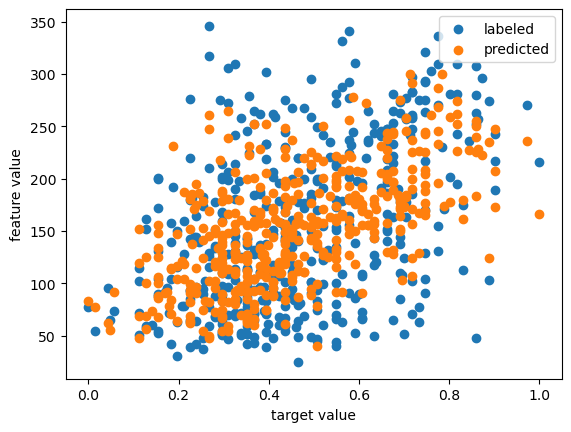

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(df_X[:,3], df_y, label= 'labeled')
plt.scatter(df_X[:,3], regression_model(df_X,W,b), label = 'predicted')
plt.ylabel('feature value')
plt.xlabel('target value')
plt.legend()

plt.show()

파란색이 실제값, 주황색이 예측값입니다.

완벽하지는 않지만, 꽤 그럴싸하게 예측했네요.

그럼 이 프로젝트는 여기서 마무리하도록 하고, scikitlearn에서 제공하는 회귀모델을 이용해서 다음 프로젝트를 수행해보도록 하겠습니다. 

</br>
</br>

---

# 💦⛅️🚲 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?



위에는 회귀 모델의 필요한 함수들을 모두 직접 코딩하여 예측모델을 만들었습니다. 

이번에는 Scikit-Learn에서 제공하는 모듈을 이용해서 회귀 모델을 수행해보겠습니다. 

두번째 프로젝트에서는 자전거 대여 수를 예측하도록 하겠습니다. 

- metric으로는 RMSE를 사용하도록 하겠습니다.(이번 목표는 150이하로 떨어트리는 것입니다.)

$$ RMSE(RootMeanSquaredError)  =  \sqrt{MSE} $$

주어진 데이터는 다음과 같습니다 :

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

`registered` 과 `casual` feature는 `count`(이번 프로젝트 레이블 값) 를 만들때 사용된 feature입니다. 

데이터 누수(data leakage)로 이어질 수 있으니 제외해야합니다. 

데이터 누수는 training 과정에서 이미 예측값을 알려주는 feature를 사용하는 것을 뜻합니다. 

이 두 feature로 설명드리자면, 실전 상황에서 count를 예측하는 것이고 registered 그리고 casual feature 값을 알 수 있다면 count는 100% 맞출수 있습니다. 그러나 이건 현실적으로 말이 되지 않습니다.그럼 모델이 필요 없겠죠?

따라서 전처리 과정에서 이 두 feature는 꼭 삭제해야겠습니다.

https://medium.com/@gurupratap.matharu/data-leakage-in-machine-learning-390d560f0969

## (1) 데이터 가져오기

train.csv 파일을 다운로드 받아서 이 프로젝트를 진행하고 있습니다. 

작업경로 상위 폴더의 파일을 저장하였습니다. 

그럼 pandas로 파일을 읽어와서 EDA를 진행해보겠습니다. 

- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
- 여기에서 데이터를 상세히 확인할 수 있습니다.

In [25]:
wdata = pd.read_csv('../train.csv')

데이터를 빠르게 확인하였을때, `datetime` feature 제일 먼저 눈에 들어오네요. 

object 자료형으로 읽혔습니다. 분석을 위해 datetime자료형으로 만들어주겠습니다. 

이어서, datetime feature를 year, month, day, hour, minute, seconds를 추가하도록 하겠습니다. 

In [26]:
wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [27]:
wdata.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [28]:
obcol = wdata.dtypes.value_counts()

In [29]:
flcol = wdata.select_dtypes('float64').columns

In [30]:
intcol = wdata.select_dtypes('int64').columns

`season` feature도 눈에 들어오네요.

int 자료형이지만, 각 계절 값의 간격은 의미가 없습니다. 

이럴땐 one-hot enconding을 통해 이 문제를 해결할 수 있습니다. 


In [31]:
wdata = pd.get_dummies(wdata, columns =['season'])

## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

위에 언급했었던 datetime feature를 가공해보겠습니다. 

먼저  pd.to_datetime으로 자료형을 변경하겠습니다.

In [32]:
wdata['datetime_new'] = pd.to_datetime(wdata['datetime'])
wdata['datetime_new']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime_new, Length: 10886, dtype: datetime64[ns]

자료형이 datetime64[ns] 변경된것으로 확인하실 수 있습니다. 

datetime64 자료형은 year, month, day, hour, minute, second 내용을 따로 반환할 수 있습니다. 

map 함수를 이용해서 새로운 feature 들을 만들겠습니다. 

In [33]:
#연
wdata['year'] = wdata['datetime_new'].map(lambda x : x.year)
#월
wdata['month'] = wdata['datetime_new'].map(lambda x : x.month)
#일
wdata['day'] = wdata['datetime_new'].map(lambda x : x.day)
#시
wdata['hour'] = wdata['datetime_new'].map(lambda x : x.hour)
#분
wdata['min'] = wdata['datetime_new'].map(lambda x : x.minute)
#초
wdata['sec'] = wdata['datetime_new'].map(lambda x : x.second)

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

자 그럼 새롭게 만든 feature들의 count를 확인하겠습니다. 

sns countplot을 사용하면 예쁘게 잘 나오겠죠?

In [34]:
time_col = ['year','month','day','hour','min','sec']

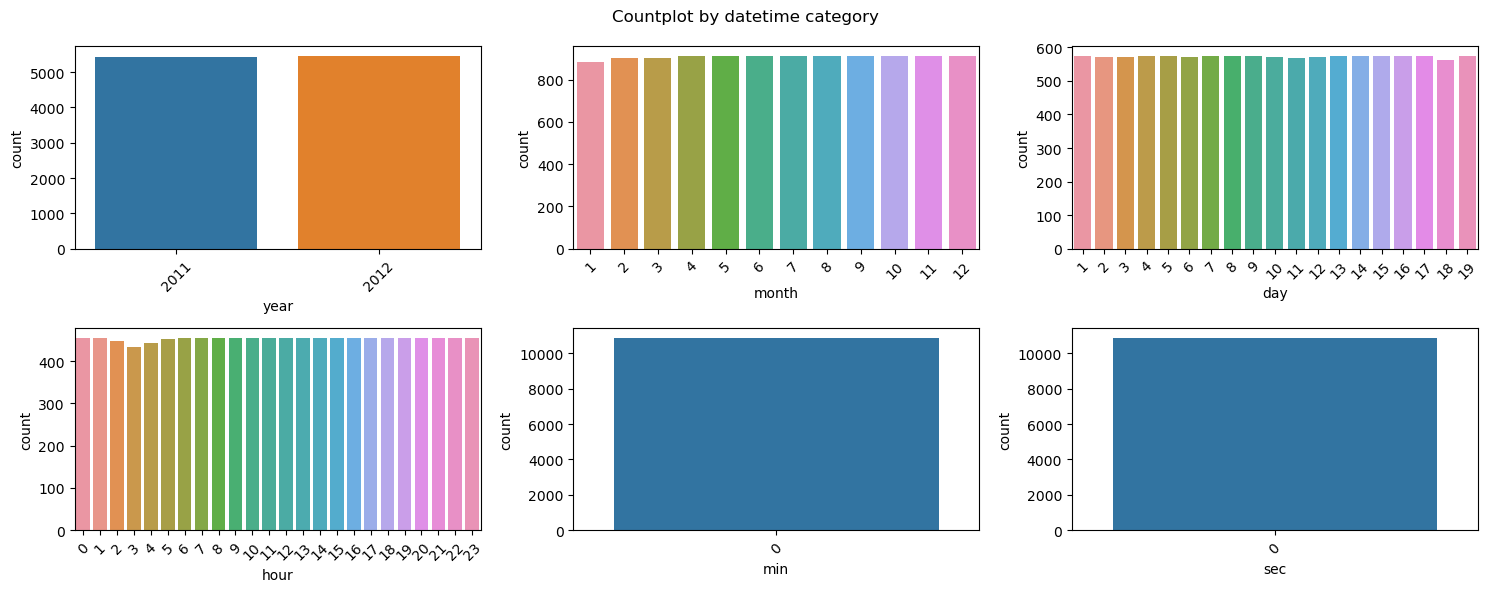

In [35]:
fig = plt.figure(figsize = (15,6))
for i, col in enumerate(time_col) :
    ax = fig.add_subplot(2,3,i+1)
    sns.countplot(data = wdata, x = col)
    plt.xticks(rotation=45)

plt.suptitle('Countplot by datetime category')
plt.tight_layout()
plt.show()

min 그리고 sec은 모두 0값 으로 나오네요. 

유의미한 정보가 아니기 때문에 전처리할때 삭제하겠습니다. 

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

위에 EDA에서 제외되어야할 feature들을 살펴봤습니다. 

상관계수를 찾으면 바로 다시 눈에 띄는 것을 볼 수 있을 겁니다. 

min, sec = NaN

registered, casual 은 상관계수가 당연히 높게 나올 수 밖에 없겠죠?

In [36]:
wdata.corr()['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season_3      0.136942
windspeed     0.101369
season_2      0.075681
season_4      0.023704
day           0.019826
workingday    0.011594
holiday      -0.005393
weather      -0.128655
season_1     -0.237704
humidity     -0.317371
min                NaN
sec                NaN
Name: count, dtype: float64

그럼 삭제하도록 하겠습니다.

그리고 바로 모델 학습을 위한 데이터 컬럼을 준비하겠습니다. 

In [37]:
remove_col = ['min','sec','causal','registered', 'count', 'datetime_new', 'datetime']
train_col = list(set(wdata.columns) - set(remove_col))
train_col

['humidity',
 'windspeed',
 'season_1',
 'weather',
 'temp',
 'season_3',
 'holiday',
 'casual',
 'season_2',
 'atemp',
 'year',
 'month',
 'day',
 'workingday',
 'hour',
 'season_4']

마지막으로 한번더 상관계수를 살펴보겠습니다.

앗! atemp와 temp 상관계수가 엄청 높네요!!!

atemp 삭제를 하겠습니다. 

In [38]:
wdata[train_col].corr().style.background_gradient(cmap = 'YlGn')

,humidity,windspeed,season_1,weather,temp,season_3,holiday,casual,season_2,atemp,year,month,day,workingday,hour,season_4
humidity,1.000000,-0.318607,-0.166208,0.406244,-0.064949,0.067308,0.001929,-0.348187,-0.031095,-0.043536,-0.078606,0.204537,-0.011335,-0.010880,-0.278011,0.129018
windspeed,-0.318607,1.000000,0.128819,0.007261,-0.017852,-0.091521,0.008409,0.092276,0.042991,-0.057473,-0.015221,-0.150192,0.036157,0.013373,0.146631,-0.079535
season_1,-0.166208,0.128819,1.000000,0.005414,-0.565655,-0.331365,-0.007336,-0.235222,-0.331365,-0.569082,0.006315,-0.750291,-0.002491,-0.000379,0.008357,-0.331446
weather,0.406244,0.007261,0.005414,1.000000,-0.055035,-0.047316,-0.007074,-0.135918,0.004157,-0.055376,-0.012548,0.012144,-0.007890,0.033772,-0.022740,0.037771
temp,-0.064949,-0.017852,-0.565655,-0.055035,1.000000,0.635975,0.000295,0.467097,0.192661,0.984948,0.061226,0.257589,0.015551,0.029966,0.145430,-0.266220
season_3,0.067308,-0.091521,-0.331365,-0.047316,0.635975,1.000000,0.022790,0.187726,-0.335214,0.607090,-0.001598,0.248354,0.000941,-0.007194,-0.002611,-0.335296
holiday,0.001929,0.008409,-0.007336,-0.007074,0.000295,0.022790,1.000000,0.043799,-0.038250,-0.005215,0.012021,0.001731,-0.015877,-0.250491,-0.000354,0.022751
casual,-0.348187,0.092276,-0.235222,-0.135918,0.467097,0.187726,0.043799,1.000000,0.132405,0.462067,0.145241,0.092722,0.014109,-0.319111,0.302045,-0.086258
season_2,-0.031095,0.042991,-0.331365,0.004157,0.192661,-0.335214,-0.038250,0.132405,1.000000,0.204421,-0.002446,-0.255581,0.001019,0.014620,-0.002733,-0.335296
atemp,-0.043536,-0.057473,-0.569082,-0.055376,0.984948,0.607090,-0.005215,0.462067,0.204421,1.000000,0.058540,0.264173,0.011866,0.024660,0.140343,-0.245690


In [39]:
wdata[train_col].describe()

,humidity,windspeed,season_1,weather,temp,season_3,holiday,casual,season_2,atemp,year,month,day,workingday,hour,season_4
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,61.886460,12.799395,0.246739,1.418427,20.23086,0.251056,0.028569,36.021955,0.251056,23.655084,2011.501929,6.521495,9.992559,0.680875,11.541613,0.251148
std,19.245033,8.164537,0.431133,0.633839,7.79159,0.433641,0.166599,49.960477,0.433641,8.474601,0.500019,3.444373,5.476608,0.466159,6.915838,0.433694
min,0.000000,0.000000,0.000000,1.000000,0.82000,0.000000,0.000000,0.000000,0.000000,0.760000,2011.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,47.000000,7.001500,0.000000,1.000000,13.94000,0.000000,0.000000,4.000000,0.000000,16.665000,2011.000000,4.000000,5.000000,0.000000,6.000000,0.000000
50%,62.000000,12.998000,0.000000,1.000000,20.50000,0.000000,0.000000,17.000000,0.000000,24.240000,2012.000000,7.000000,10.000000,1.000000,12.000000,0.000000
75%,77.000000,16.997900,0.000000,2.000000,26.24000,1.000000,0.000000,49.000000,1.000000,31.060000,2012.000000,10.000000,15.000000,1.000000,18.000000,1.000000
max,100.000000,56.996900,1.000000,4.000000,41.00000,1.000000,1.000000,367.000000,1.000000,45.455000,2012.000000,12.000000,19.000000,1.000000,23.000000,1.000000


In [53]:
train_col.remove('atemp')

In [54]:
X = wdata[train_col].values
y = wdata['count'].values

마지막으로 feature scaling을 진행해서 정규화 작업을 하겠습니다. 

정규화는 모든 feature들을 공통된 범주 안으로 만들어주어, 값이 지나치게 큰 변수들이 모델에 일반적으로 영향을 미치는 것을 막아줍니다.

https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23 )

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7620, 15) (3266, 15)
(7620,) (3266,)


## (5) LinearRegression 모델 학습

sklearn의 LinearRegression 모델 불러와서 학습시켜보도록 하겠습니다.

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train)

LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [60]:
from sklearn.metrics import mean_squared_error

In [62]:
prediction = linearmodel.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse ** 0.5
print('mse : ',mse,', rmse : ', rmse)

mse :  13136.11506334201 , rmse :  114.61289222134658


오! 성공적으로 학습을 완료하였습니다.

RMSE를 114까지 떨어트렸습니다.

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

그럼 마지막으로 저희 예측모델과 label을 얼마나 잘 맞추었는지 그래프로 만들어서 확인하겠습니다.

`humidity`와 `temp` 변수를 사용하겠습니다. 

먼저 저희 train_col 리스트에서 몇 번째 순서인지 모르기 때문에, list.index() 함수를 이용해서 가져와서 그래프를 만들겠습니다. 

In [63]:
hindx = train_col.index('humidity')

In [64]:
tindx = train_col.index('temp')

In [65]:
final_y = linearmodel.predict(X)

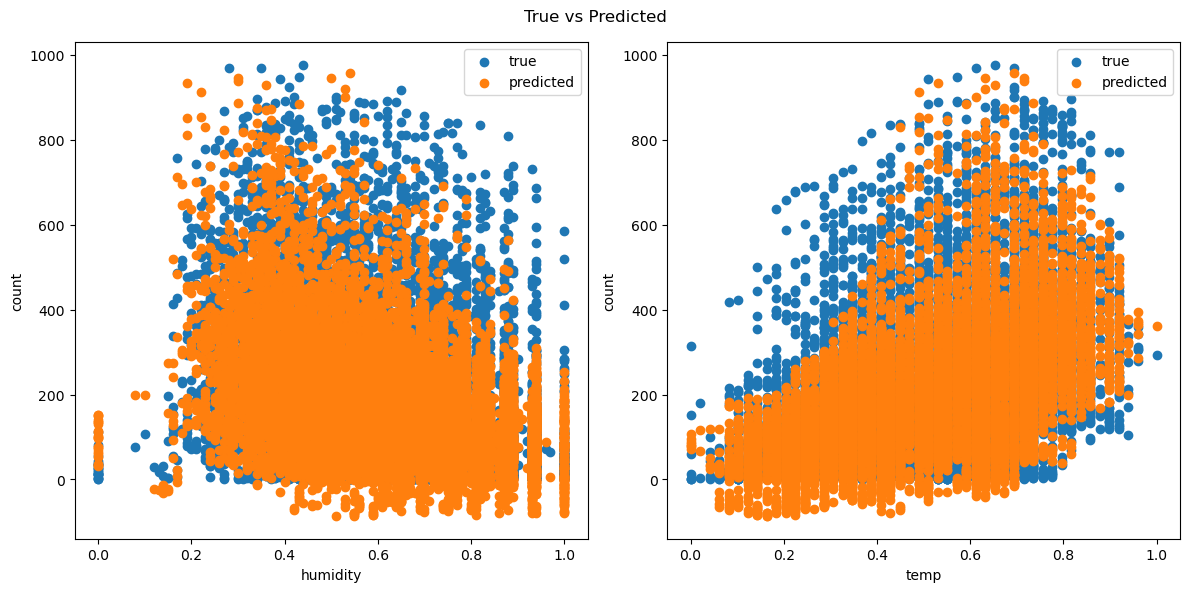

In [66]:
fig = plt.figure(figsize = (12,6) )

ax = fig.add_subplot(1,2,1)
plt.scatter(X[:,hindx], y, label = 'true')
plt.scatter(X[:,hindx], final_y, label = 'predicted')
plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(X[:,tindx], y, label = 'true')
plt.scatter(X[:,tindx], final_y, label = 'predicted')
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()

plt.suptitle('True vs Predicted')
plt.tight_layout()

plt.show()

파란색이 실제값, 주황색이 예측값입니다.

완벽하지는 않지만, 꽤 그럴싸하게 예측했네요.

그럼 이번 프로젝트는 여기서 마무리하도록 하겠습니다. 

## 결론


이 노트북에서는 다루지는 않겠지만, 다른 고급 알고리즘을 이용하면 현재 예측모델의 cost를 줄일 수 있을 것입니다.

Ensemble, Cross-Validation, Grid-Search 등 다중 모델을 이용하는 방법, 학습 셋을 다양하게 분활하는 방법, 그리고 하이퍼 파라미터를 optimizing하는 방법도 있습니다. 

고급 알고리즘은 성능 개선은 정말 뛰어날 것으로 예상됩니다. 

언젠가 어렵고 복잡한 회귀 문제들을 맞이할 것 같습니다. 

그 상황을 대비해서 단단한 기본기와 고급 알고리즘까지 숙지해야겠죠?

기회가 되면 이 문제를 다른 고급 알고리즘, 전처리 등의 과정을 거처서 해결해 보도록 하겠습니다. 

Happy Machine Learning! 🔥